### Data information

Dataset has the following attributes:

- type: Event type
- duration: Duration of event? or duration of fixation?
- sac_amplitude: Amplitude of the eye saccades
- sac_endpos_x: `x coordinate` of saccades end position 
- sac_endpos_y: `y coordinate` of saccades end position
- sac_startpos_x: `x coordinate` of saccades start position
- sac_startpos_y: `y coordinate` of saccades start position
- sac_vmax: ?
- fix_avgpos_x: average `x coordinate` position 
- fix_avgpos_y: average `y coordinate` position
- fix_avgpupilsize: average pupil size of th eye
- overlapping: ?
- fix_samebox: ?
- id: Subject ID
- picID: Picture ID
- trialnum: Trial Number
- fix_type: type of the fixation.
- onset: event onset time.


### Task Summary
- Analyse dataset and find relation between variables if any

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('sub-45/eeg/sub-45_task-WLFO_events.tsv', sep='\t')
df.head(2)

type  duration  sac_amplitude  sac_endpos_x  sac_endpos_y  sac_startpos_x  \
0   __       0.0            0.0           0.0           0.0             0.0   
1  200       0.0            0.0           0.0           0.0             0.0   

   sac_startpos_y  sac_vmax  fix_avgpos_x  fix_avgpos_y  fix_avgpupilsize  \
0             0.0       0.0           0.0           0.0               0.0   
1             0.0       0.0           0.0           0.0               0.0   

   overlapping  fix_samebox  id  picID  trialnum fix_type      onset  
0            0          0.0 NaN    NaN       NaN      NaN   0.001953  
1            0          0.0 NaN    NaN       NaN      NaN  43.265625

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9279 entries, 0 to 9278
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              9279 non-null   object 
 1   duration          9279 non-null   float64
 2   sac_amplitude     8228 non-null   float64
 3   sac_endpos_x      8228 non-null   float64
 4   sac_endpos_y      8228 non-null   float64
 5   sac_startpos_x    8228 non-null   float64
 6   sac_startpos_y    8228 non-null   float64
 7   sac_vmax          6778 non-null   float64
 8   fix_avgpos_x      3683 non-null   float64
 9   fix_avgpos_y      3683 non-null   float64
 10  fix_avgpupilsize  3683 non-null   float64
 11  overlapping       9279 non-null   int64  
 12  fix_samebox       4734 non-null   float64
 13  id                171 non-null    float64
 14  picID             171 non-null    float64
 15  trialnum          171 non-null    float64
 16  fix_type          2461 non-null   object 


we observe that: 
- 'type' and 'fix_type' are categorial values.
- duration, sac_amplitude, sac_endpos_x, sac_endpos_y, sac_startpos_x, sac_startpos_y, sac_vmax, fix_avgpos_x, fix_avgpos_y, fix_avgpupilsize, overlapping, fix_samebox, id, picID, trailnum, onset are numerical attributes
 

### Understanding categorical variables 

In [9]:
df['fix_type'].unique()

array([nan, 'NonetoNone', 'NonetoHF', 'HFtoNone', 'HFtoHF', 'NonetoOS',
       'OStoNone', 'NonetoHH', 'HHtoNone', 'OLtoNone', 'HFtoNH',
       'NHtoNone', 'NonetoNH', 'OStoOS', 'NHtoNH', 'NHtoHF', 'OLtoHF',
       'HFtoHH', 'HHtoHH', 'HHtoHF', 'NonetoOL', 'OStoHF', 'OStoNH',
       'OStoHH', 'HFtoOS'], dtype=object)

### Types:
- NonetoNone:Background to Background
- NonetoHF - HFtoNone: Background to Human Face - Human Face to Backgound
- HFtoHF: Human Face to Human Face
- NonetoOS - OStoNone: Background to Outside the image - Outside to background
- NonetoHH - HHToNone: ?
- OLtoNone: ?
- HFtoNH: Human Face to ?
- NHtoNone: ?
- OStoOS: ?
- NHtoNH: ?
- OLtoHF: ___ to Human Face?
- HFtoHH: Human Face to ___?
- HHtoHH: ?
- NonetoOL: ?
- OstoHF - OStoNH:?
- OStoHH - HFtoOS: ?

In [10]:
df['type'].unique()

array(['__', '200', 'blink', 'stimulus', 'fixation', 'saccade',
       'blinkFix', '180', '212', '213', '214', '255'], dtype=object)

### Triggers
- 213, 214, 215 : Recalibration settings for eye tracker
- 180: End of stimulus  

`Null Values` in the dataset

In [11]:
df.isnull().sum()

type                   0
duration               0
sac_amplitude       1051
sac_endpos_x        1051
sac_endpos_y        1051
sac_startpos_x      1051
sac_startpos_y      1051
sac_vmax            2501
fix_avgpos_x        5596
fix_avgpos_y        5596
fix_avgpupilsize    5596
overlapping            0
fix_samebox         4545
id                  9108
picID               9108
trialnum            9108
fix_type            6818
onset                  0
dtype: int64

# Insights on distribution 
Plotting individual attributes

In [12]:
df.describe()

duration  sac_amplitude  sac_endpos_x  sac_endpos_y  sac_startpos_x  \
count  9279.000000   8.228000e+03   8228.000000   8228.000000     8228.000000   
mean      0.174434   7.382839e+03   1869.303683    962.230421     1867.923748   
std       0.801564   1.180972e+05    805.722577    396.942048      790.067125   
min       0.000000   0.000000e+00      0.000000   -669.500000        0.000000   
25%       0.011000   1.150000e+00   1410.000000    786.450000     1443.000000   
50%       0.039500   3.385000e+00   1958.800000   1012.300000     1941.900000   
75%       0.101000   8.820000e+00   2479.350000   1200.300000     2454.075000   
max       6.000000   2.000000e+06   4555.000000   4119.800000     4551.800000   

       sac_startpos_y     sac_vmax  fix_avgpos_x  fix_avgpos_y  \
count     8228.000000  6778.000000   3683.000000   3683.000000   
mean       959.980177   193.220271   1691.337958    844.414635   
std        393.420906   121.568228    964.729238    461.817675   
min      -1124.300000     0.000000      0.000000    -13.800000   
25%        788.225000    94.000000   1154.900000    677.000000   
50%       1009.000000   180.000000   1869.000000    924.800000   
75%       1181.300000   294.000000   2478.300000   1157.750000   
max       4146.000000   893.000000   4507.000000   2427.500000   

       fix_avgpupilsize  overlapping  fix_samebox     id       picID  \
count       3683.000000  9279.000000  4734.000000  171.0  171.000000   
mean         188.400489     0.000754     0.065906   45.0   86.000000   
std          100.454462     0.027457     0.248144    0.0   49.507575   
min            0.000000     0.000000     0.000000   45.0    1.000000   
25%          159.000000     0.000000     0.000000   45.0   43.500000   
50%          210.000000     0.000000     0.000000   45.0   86.000000   
75%          254.000000     0.000000     0.000000   45.0  128.500000   
max          436.000000     1.000000     1.000000   45.0  171.000000   

         trialnum        onset  
count  171.000000  9279.000000  
mean    86.000000  1456.682525  
std     49.507575   860.944280  
min      1.000000     0.001953  
25%     43.500000   663.708008  
50%     86.000000  1413.116211  
75%    128.500000  2325.609375  
max    171.000000  2877.192383

In [13]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import wordcloud
import warnings
warnings.filterwarnings('ignore')

Define Plotting functions

In [25]:
def Plot_dis(text):
  f= plt.figure(figsize=(21,5))
  
  ax=f.add_subplot(131)
  sns.distplot(df[text],color='b',ax=ax)
  ax.set_title('Distribution of {}'.format(text))

  ax=f.add_subplot(132)
  sns.distplot(df[(df.fix_type == 'NonetoNone')][text], color='g',ax=ax)
  ax.set_title('Distribution of {} for Background-Background'.format(text))
  
  ax=f.add_subplot(133)
  sns.distplot(df[(df.fix_type == 'NonetoHF') & (df.fix_type == 'HFtoNone')][text],color='c',ax=ax)
  ax.set_title('Distribution of {} for Background-HumanFace and vice-versa'.format(text))

  f1= plt.figure(figsize=(13,5))
  
  ax=f1.add_subplot(121)
  sns.distplot(df[(df.fix_type == 'HFtoHF')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for HumanFace-HumanFace'.format(text))

  ax=f1.add_subplot(122)
  sns.distplot(df[(df.fix_type == 'HFtoOS') & (df.fix_type == 'OStoHF')][text],color='g',ax=ax)
  ax.set_title('Distribution of {} for HumanFace-Outside and vice versa'.format(text))

In [44]:
def Plot_box(text):
  fig, axes = plt.subplots(figsize=(25, 15))
  fig.suptitle('Box plot of {}'.format(text))
  sns.boxplot(ax=axes, data=df, y=text, x='fix_type')

In [47]:
def Plot_scat(parameter1, parameter2,var1,var2):
  
  f= plt.figure(figsize=(25,5))
  ax=f.add_subplot(121)
  sns.scatterplot(x=parameter1,y=parameter2,hue=var1,data=df,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var1))
  
  ax=f.add_subplot(122)
  sns.scatterplot(x=parameter1, y=parameter2,hue=var2,data=df,ax=ax)
  ax.set_title('Relationship between {} and {} in function of {}'.format(parameter1,parameter2,var2))

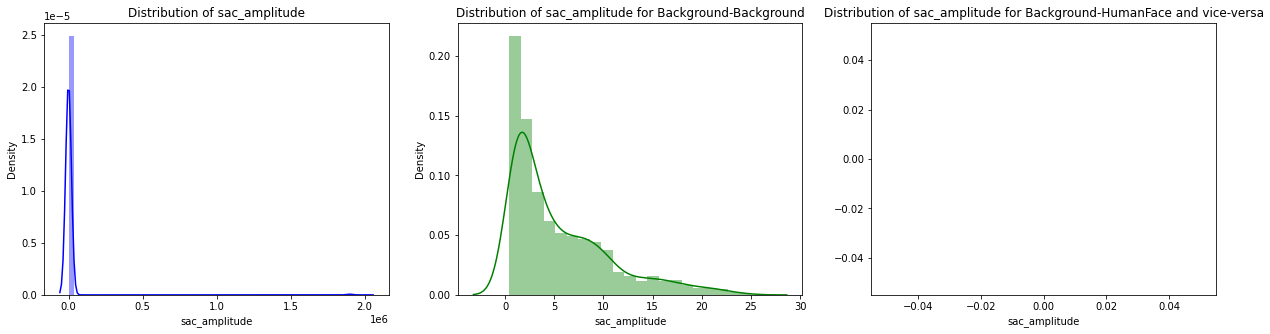

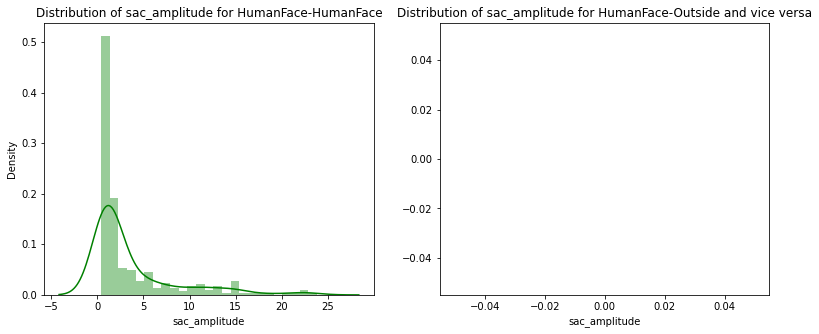

In [26]:
Plot_dis('sac_amplitude')

It appears that we mostly have right skewed distribution and, 
- People are are spending more time in background to background fixation which seems strange! Normally we have tendency to look foreground objects in the image.
- People are are spending more time doing human to human fixation which seems okay. This supports the hypothesis that we have tendency to look foreground objects in the image.

Futhermore, we can see that most test subjects are either looking/exploring the image background and then the image foreground -- and we don't have a significant effect at the boundary i.e. between image foreground and background. It is like we are segmenting the image and looking at individual pieces.

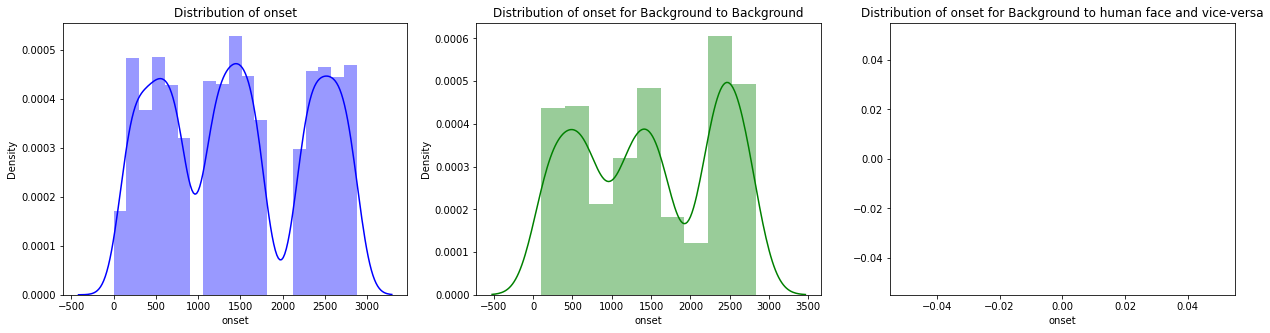

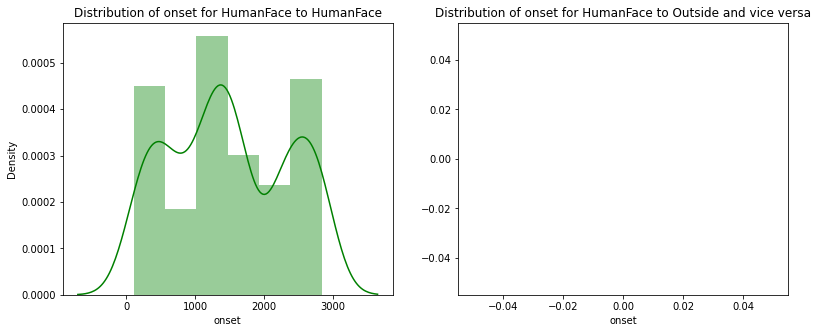

In [24]:
Plot_dis('onset')

It looks like the onset distribution is somewhat periodic with peaks at 500, 1500, 2500. 

Also, at the peak or at the middle of a period, the subjects have higher tendency of looking at the background of the image. 

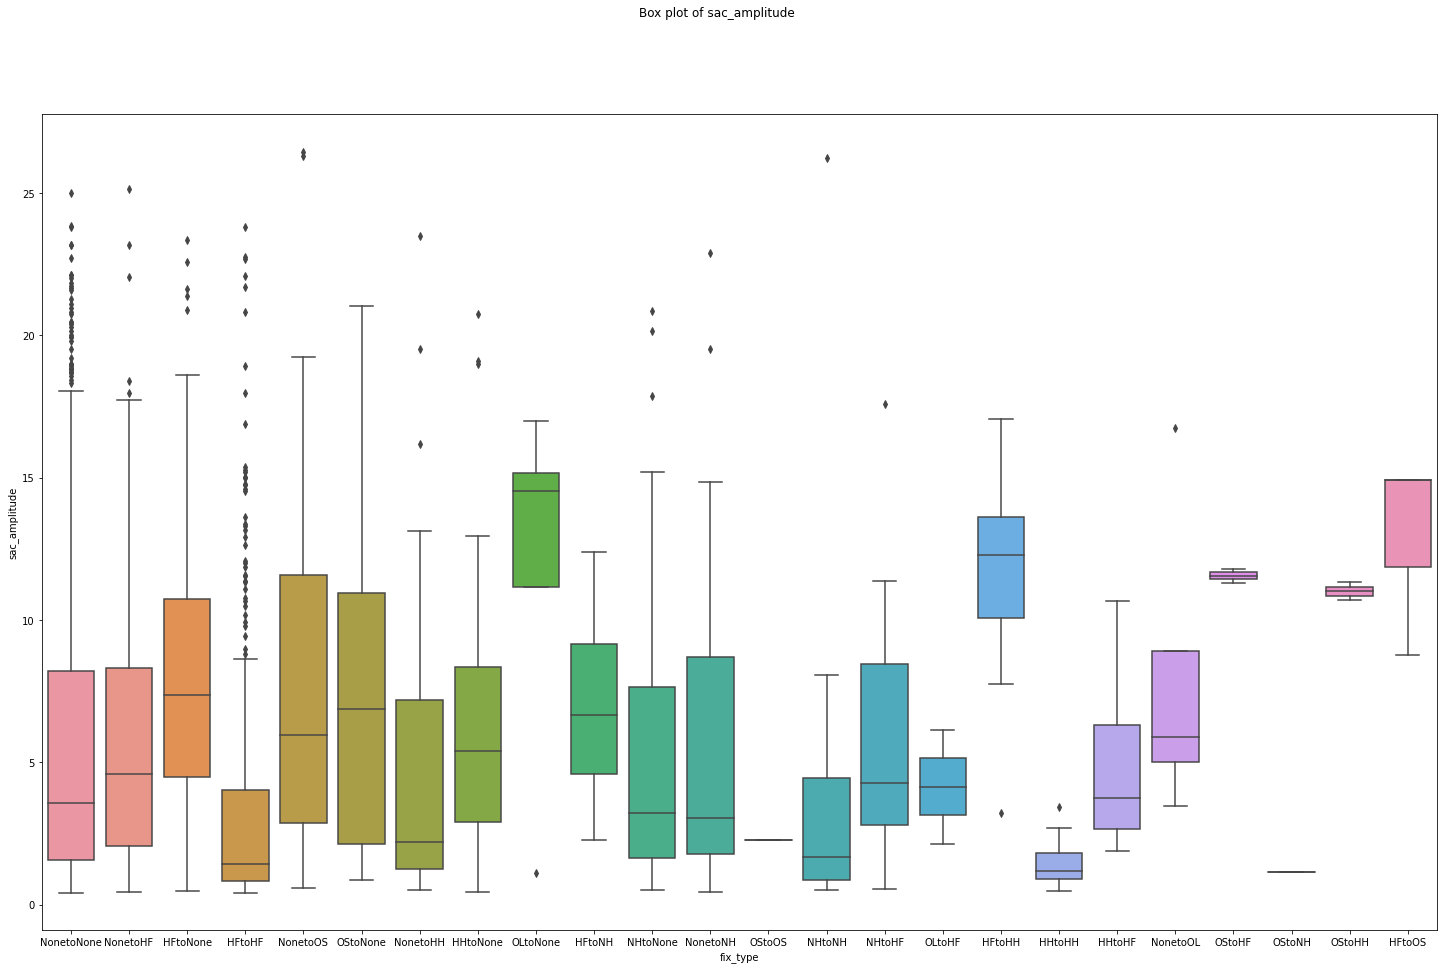

In [45]:
Plot_box('sac_amplitude')

### Plotting scatter plots for eye fixations

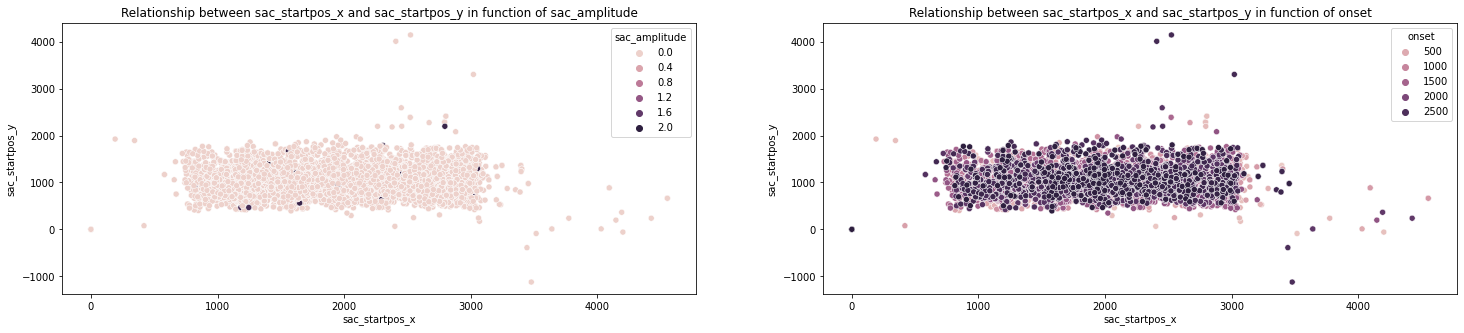

In [48]:
Plot_scat('sac_startpos_x', 'sac_startpos_y', 'sac_amplitude', 'onset')

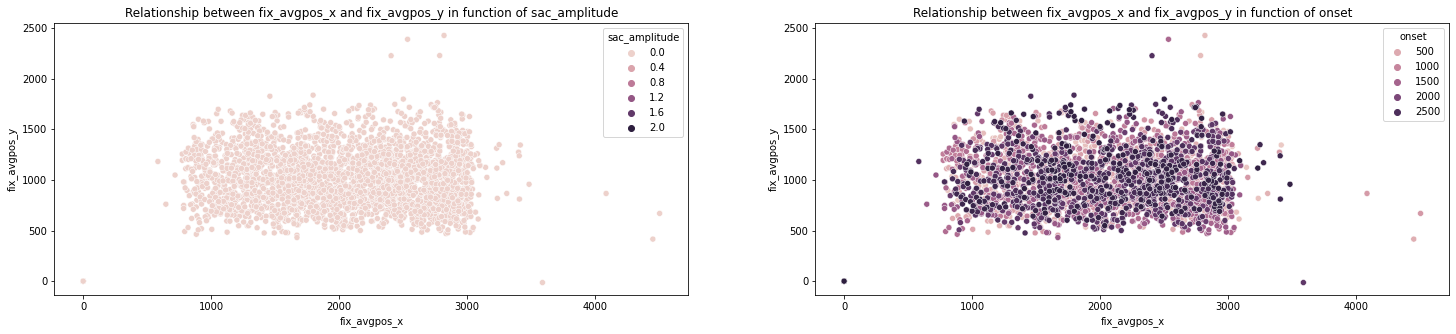

In [49]:
Plot_scat('fix_avgpos_x', 'fix_avgpos_y', 'sac_amplitude', 'onset')

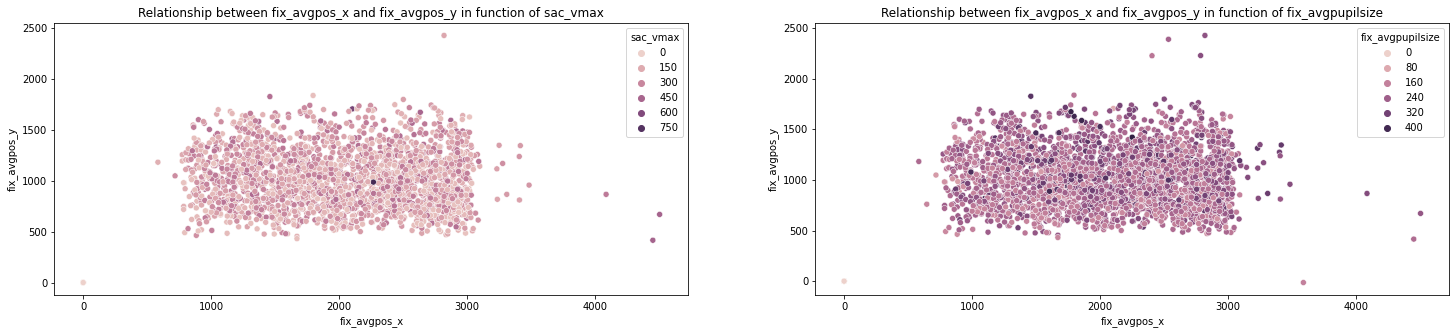

In [51]:
Plot_scat('fix_avgpos_x', 'fix_avgpos_y', 'sac_vmax', 'fix_avgpupilsize')

## Finding Correlation

Text(0.5, 1.0, 'Correlation between numerical parameters')

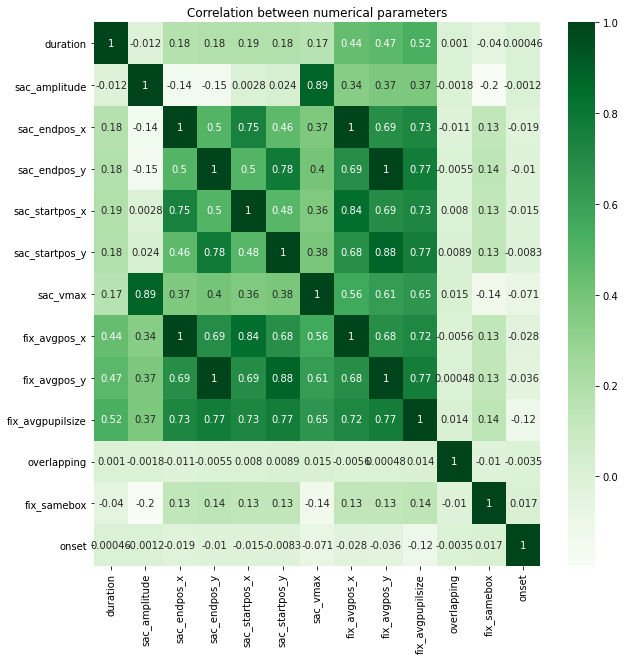

In [18]:
correlation = df[['duration', 'sac_amplitude', 'sac_endpos_x', 'sac_endpos_y', 'sac_startpos_x', 'sac_startpos_y', 'sac_vmax', 'fix_avgpos_x', 'fix_avgpos_y', 'fix_avgpupilsize', 'overlapping', 'fix_samebox', 'onset']].corr()

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(correlation, annot=True, cmap='Greens', ax=ax)
plt.title('Correlation between numerical parameters')

It appears that `sac_amplitude` and strong correlation with `sac_vmax, fix_avgpos_x, fix_avgpos_y, fix_avgpupilsize`

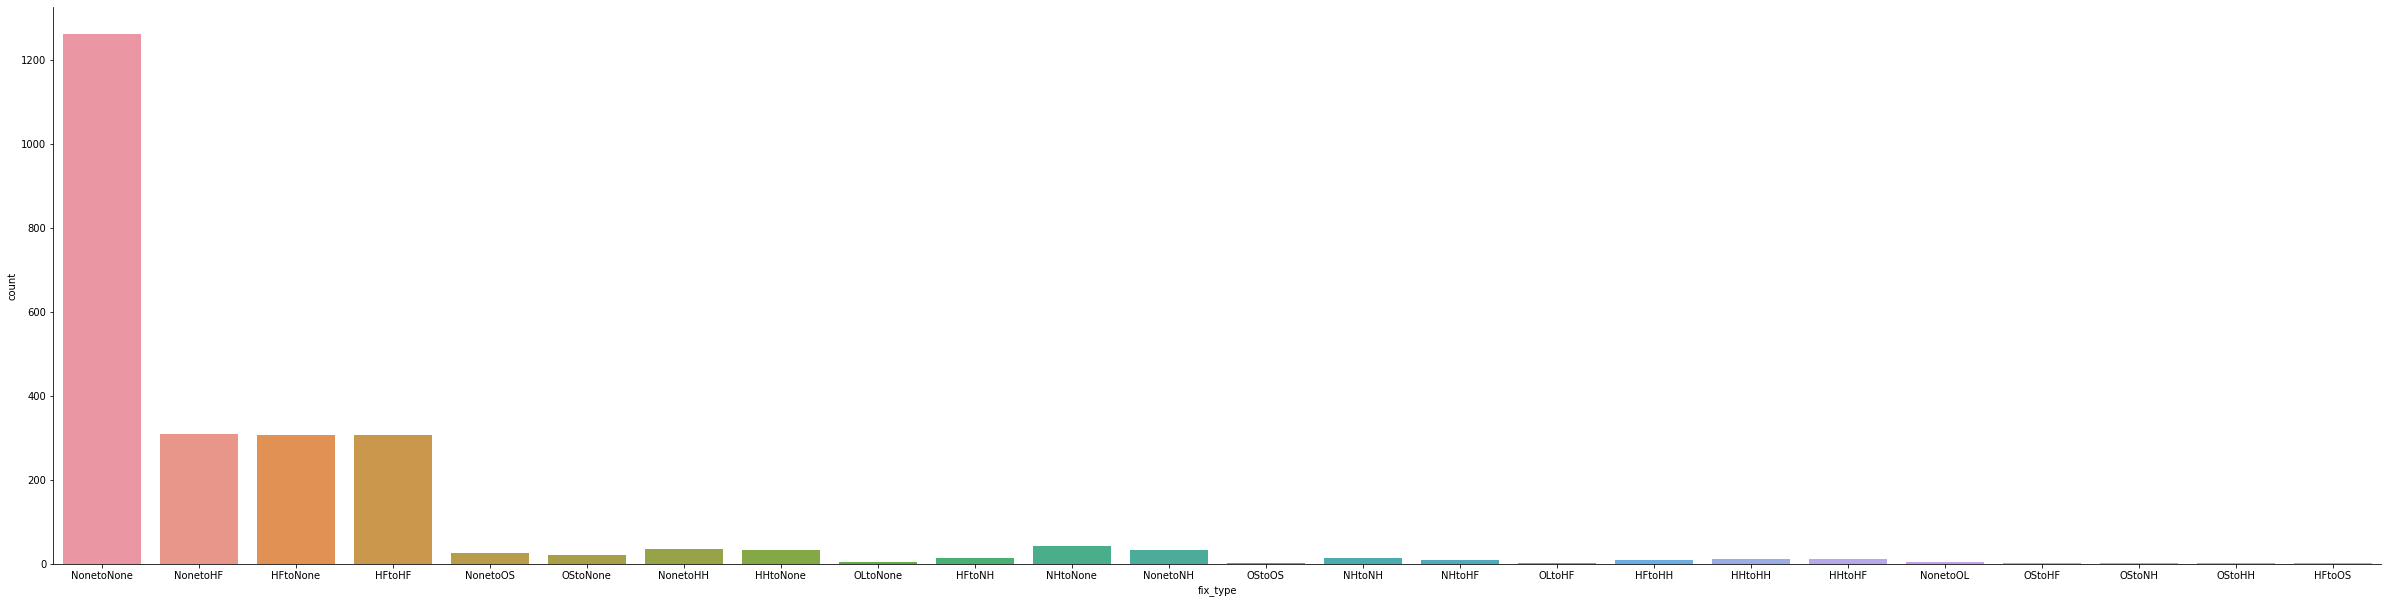

In [19]:
sns.catplot( kind='count', x='fix_type',data=df, height=8.27, aspect=20/5)

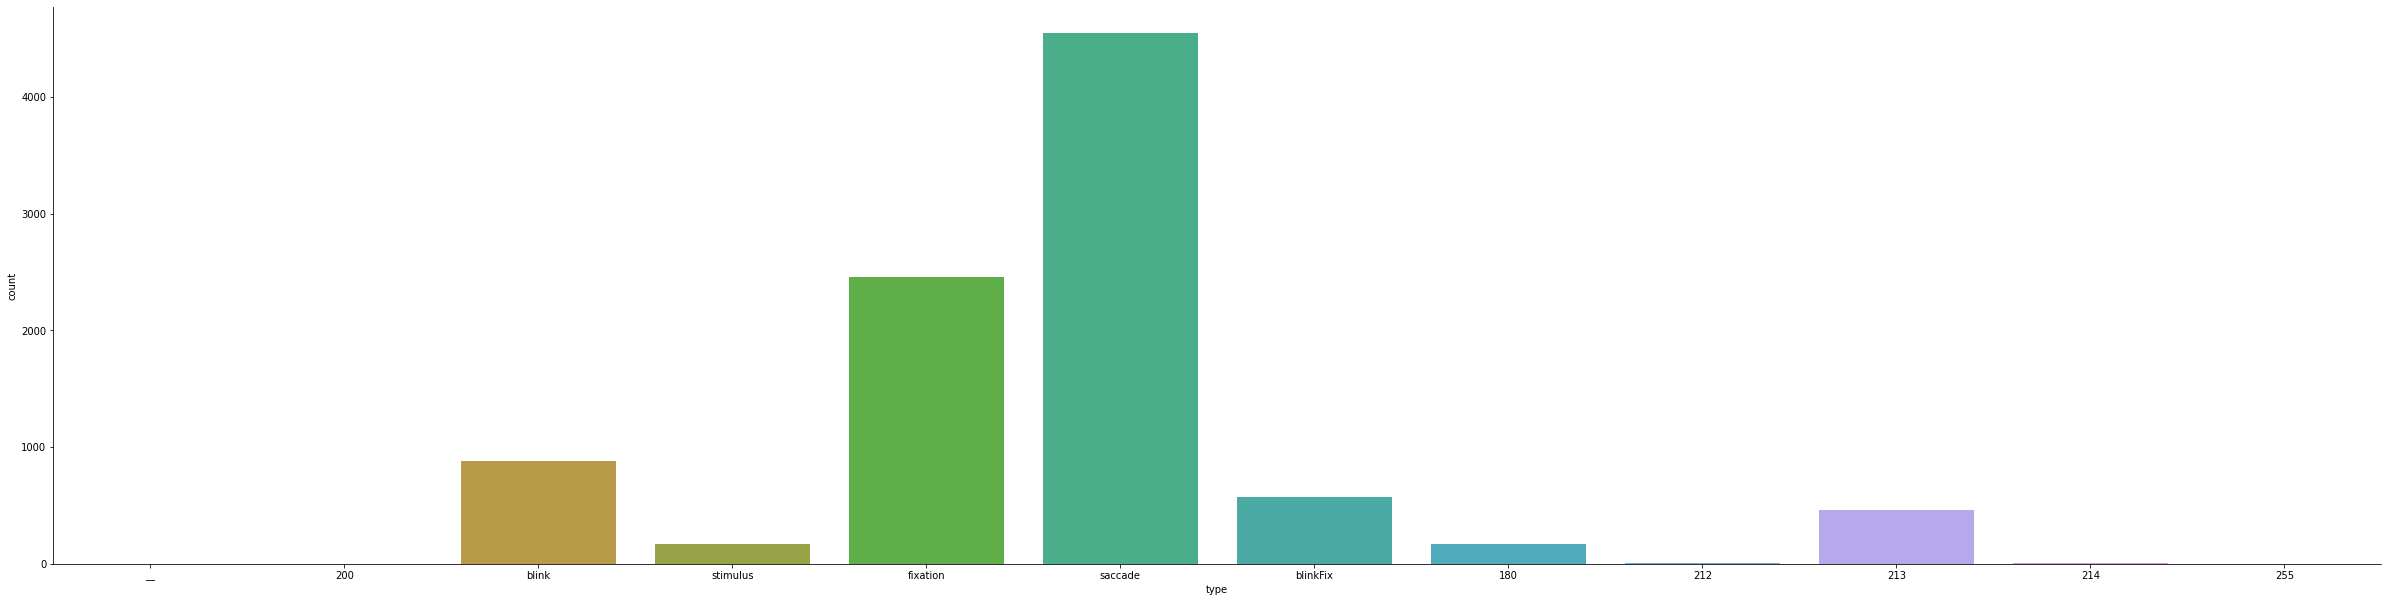

In [20]:
sns.catplot(kind='count', x='type',data=df, height=8.27, aspect=20/5)

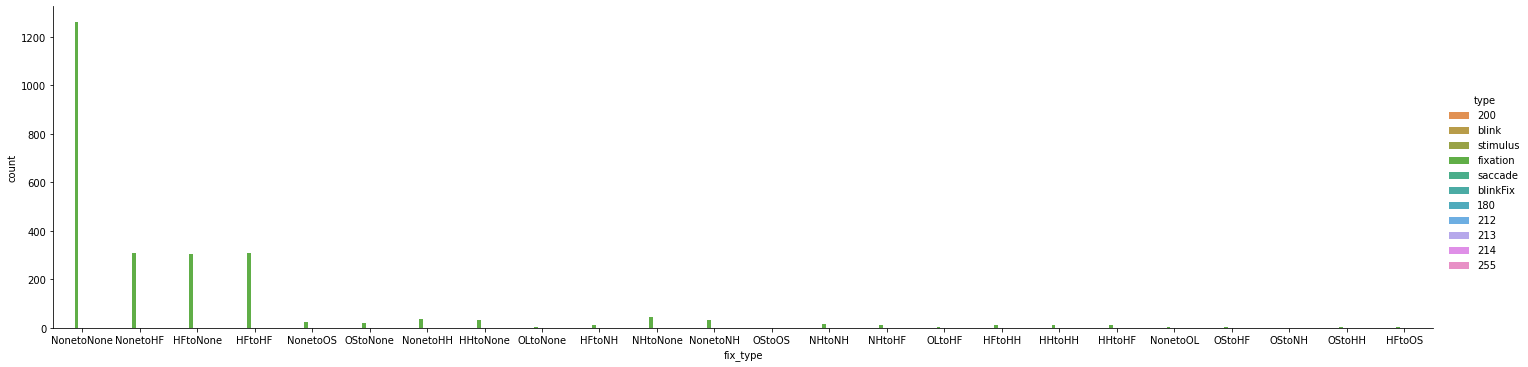

In [21]:
sns.catplot(x='fix_type',kind='count',hue='type',data=df, aspect=20/5)

In [22]:
# sns.jointplot(x='onset',y='sac_amplitude',data=df)

In [23]:
# sns.lmplot(y='sac_amplitude',x='onset',hue='fix_type',col='type',data=df)